"""
El archivo `files//shipping-data.csv` contiene información sobre los envios
de productos de una empresa. Cree un dashboard estático en HTML que
permita visualizar los siguientes campos:

* `Warehouse_block`

* `Mode_of_Shipment`

* `Customer_rating`

* `Weight_in_gms`

El dashboard generado debe ser similar a este:

https://github.com/jdvelasq/LAB_matplotlib_dashboard/blob/main/shipping-dashboard-example.png

Para ello, siga las instrucciones dadas en el siguiente video:

https://youtu.be/AgbWALiAGVo

Tenga en cuenta los siguientes cambios respecto al video:

* El archivo de datos se encuentra en la carpeta `data`.

* Todos los archivos debe ser creados en la carpeta `docs`.

* Su código debe crear la carpeta `docs` si no existe.

"""


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
#Carga datos
ruta_datos='../files/input/shipping-data.csv'
def load_data():
    df= pd.read_csv(ruta_datos)
    return df

load_data().head(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1
6,7,D,Flight,3,4,250,3,low,F,3,2371,1
7,8,F,Flight,4,1,233,2,low,F,48,2804,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
9,10,B,Flight,3,2,164,3,medium,F,29,1187,1


In [3]:
#Crea carpeta de salida
ruta_carpeta= '../docs/'
def carpeta():
    try:
        os.makedirs(os.path.dirname(ruta_carpeta))
    except FileExistsError:
        pass
carpeta()

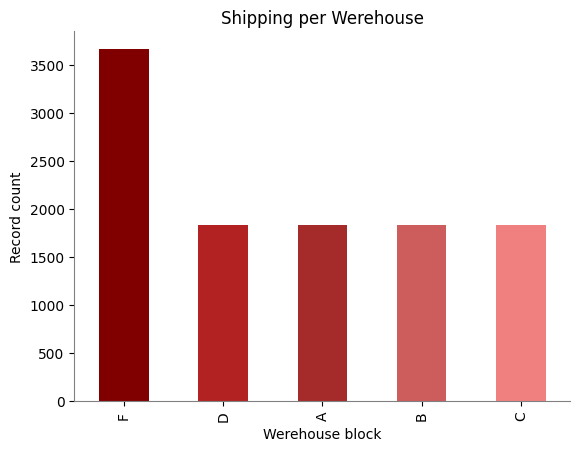

In [4]:
#Gráfico Warehouse_block
colors1 = [
    'maroon',
    'firebrick',
    'brown',
    'indianred',
    'lightcoral',
]
def graf_Warehouse_block(df):
    df= df.copy()
    plt.Figure()
    counts=df.Warehouse_block.value_counts()
    counts.plot.bar(
        title = 'Shipping per Werehouse',
        xlabel = 'Werehouse block',
        ylabel = 'Record count',
        color = colors1, #'maroon',
        fontsize = 10
    )
    
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_color('gray')
    plt.gca().spines['bottom'].set_color('gray')
    plt.savefig('../docs/shipping_per_warehouse.png')

df = load_data()
graf_Warehouse_block(df)

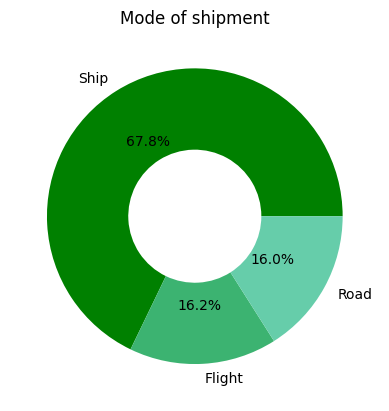

In [5]:
#Gráfica Mode_of_Shipment
colors2 = [
    'green',
    'mediumseagreen',
    'mediumaquamarine'
]
def graf_Mode_of_Shipment(df):
    df = df.copy()
    plt.figure()
    counts = df.Mode_of_Shipment.value_counts()
    counts.plot.pie(
        title = 'Mode of shipment',
        wedgeprops = dict(width=0.55),
        ylabel= '',
        colors=colors2,
        autopct='%1.1f%%'
    )
    plt.savefig('../docs/mode_of_shipment.png')

df = load_data()
graf_Mode_of_Shipment(df)

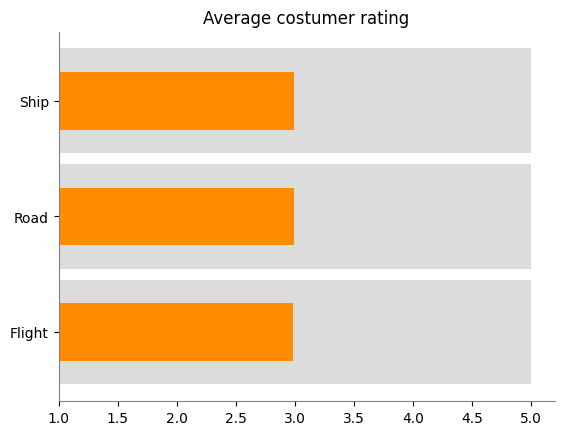

In [6]:
#Gráfica Customer_rating
def graf_Customer_rating(df):
    df = df.copy()
    plt.figure()
    df = (
        df[['Mode_of_Shipment','Customer_rating']]
        .groupby('Mode_of_Shipment')
        .describe()
    )
    df.columns = df.columns.droplevel()
    df = df[['mean', 'min','max']]
    plt.barh(
        y= df.index.values,
        width=df['max'].values - 1,
        left= df['min'].values,
        height=0.9,
        color='gainsboro'
    )
    colors3 = [
        'tab:green' if value >= 3.0 else 'darkorange' for value in df['mean'].values
    ]
    plt.barh(
        y= df.index.values,
        width=df['mean'].values - 1,
        left= df['min'].values,
        height=0.5,
        color=colors3,        
    )
    plt.title('Average costumer rating')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_color('gray')
    plt.gca().spines['bottom'].set_color('gray')
    plt.savefig('../docs/average_customer_rating.png')    

df = load_data()
graf_Customer_rating(df)


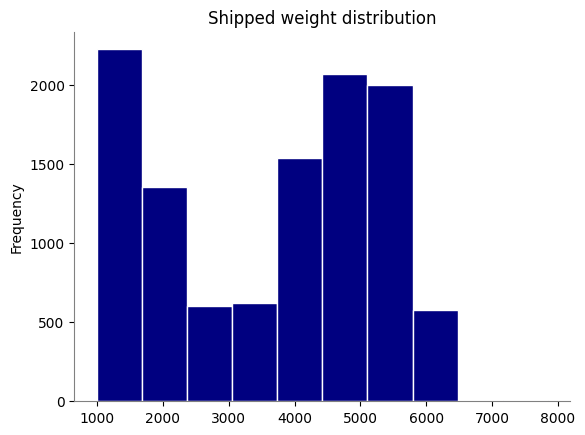

In [7]:
#Gráfica Weight_in_gms
def graf_Weight_in_gms(df):
    df= df.copy()
    plt.figure()
    df.Weight_in_gms.plot.hist(
        title='Shipped weight distribution',
        color='navy',
        edgecolor='White'
    )
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_color('gray')
    plt.gca().spines['bottom'].set_color('gray')
    plt.savefig('../docs/weight_distribution.png') 
    
df = load_data()
graf_Weight_in_gms(df)